In [3]:
import finesse
finesse.configure(plotting=True)
sm=finesse.Model()
sm.parse("""
l laser1 P=1 
s s0 laser1.p1 pr.p1 L=0
m pr R=0.9 T=0.1    
s PRC pr.p2 bs1.p1 L=1
bs bs1 R=0.5 T=0.5  

s Lx bs1.p3 ETMx.p1 L=1   
m ETMx R=1 T=0 phi=90         

s Ly bs1.p2 ETMy.p1 L=1
m ETMy R=1 T=0 
#ad circ_i pr.p1.i f=0
ad circ_c pr.p2.i f=0
xaxis(ETMy.phi,lin,-180,180,100)
""")

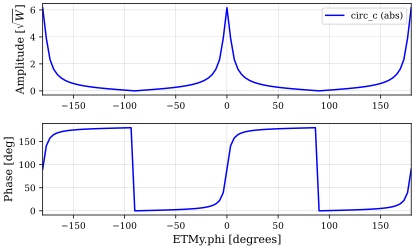

{finesse.detectors.amplitude_detector.AmplitudeDetector: <Figure size 576x355.968 with 2 Axes>,
 'circ_c': <Figure size 576x355.968 with 2 Axes>}

In [4]:
out=sm.run()
out.plot()

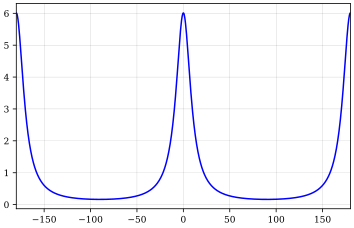

In [16]:
import matplotlib.pyplot as plt
import numpy as np
k=2E9*np.pi/1064
l_p=1
T=0.1
R=0.9
phi=np.linspace(-180,180,1000)
E_2=1j*np.sqrt(T)/(1-1j*np.sqrt(R)*np.sin(np.pi/2-np.pi*phi/90)*np.exp(-2j*k*l_p))
E_14=E_2*1j*np.exp(-2j*k*l_p)*np.sin(np.pi/2-np.pi*phi/180)
#plt.plot(phi,abs(E_14))
amp=abs(E_2)
phs=180*np.angle(E_2)/np.pi
plt.plot(phi,amp)
#plt.ylim(0,180)

In [15]:
# b=[]
# for i in range(10001):
#     if abs(circulated[i]-0.5*max(circulated))<0.15:#approximating the FWHM by finding two points close to the half maximum
#         b.append(circulated[i])
# print(b)

In [63]:
# print("FWHM_pr={}Hz".format(1E4*(circulated.index(b[1])-circulated.index(b[0]))))
# print("FSR_pr={}Hz".format(1.5E8))
# print("FINESSE_pr={}".format(1.5E8/(1E4*(circulated.index(b[1])-circulated.index(b[0])))))